In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
X = np.load('./MNIST_data/mnist_data.npy')
y = np.load('./MNIST_data/mnist_labels.npy')

In [8]:
X = X/255.

In [11]:
random_index = np.random.randint(0, X.shape[0], 1)
random_digit = X[random_index]

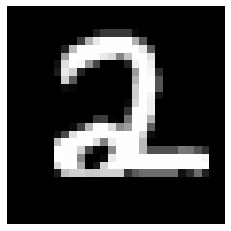

In [12]:
plt.imshow(random_digit.reshape((28,28)), cmap='gray')
_ = plt.axis('off')

In [15]:
(random_digit*255).reshape((28,28)).astype(np.int)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29,  56,
         56,  56,  56,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,  58, 178, 232, 253,
        253, 253, 253, 177,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  33, 187, 253, 253, 253, 253,
        253, 253, 253, 253, 232,  91,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [16]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=10000)

In [17]:
Xtrain.shape

(60000, 784)

In [18]:
ytrain.shape

(60000,)

In [19]:
def sample_bootstrap(X, y, sample_size, return_OOB_sample = False):
    sample_indices = np.random.randint(0,X.shape[0], sample_size)
    if return_OOB_sample:
        oob_indices = np.array([i for i in np.arange(0, X.shape[0], 1, dtype=int) if i not in sample_indices])
        return X[sample_indices, :], y[sample_indices], X[oob_indices, :], y[oob_indices]
    else:
        return X[sample_indices, :], y[sample_indices]

In [20]:
sample_size = Xtrain.shape[0]
Xtr,ytr,Xoob,yoob = sample_bootstrap(Xtrain,ytrain, sample_size=sample_size, return_OOB_sample=True)
MLR = LogisticRegression()
MLR.fit(Xtr, ytr)
yoob_pred = MLR.predict(Xoob)
yoob_proba = MLR.predict_proba(Xoob)
print('accuracy: ' + str(np.mean(np.squeeze(yoob_pred)==yoob)))

accuracy: 0.9175444969124591
